In [1]:
%matplotlib inline
import cv2
import copy
import numpy as np
import matplotlib.pyplot as plt
from Crypto.Cipher import AES
plt.figure(figsize=(10,20))

<Figure size 720x1440 with 0 Axes>

<Figure size 720x1440 with 0 Axes>

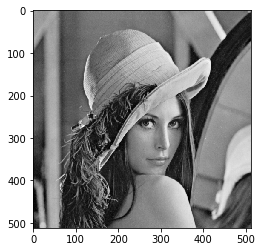

In [2]:
img = cv2.cvtColor(cv2.imread('Test_Images/Lena.tiff'), cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')

In [3]:
stegImg = np.zeros((img.shape[0],img.shape[1],8))
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        tempNum = np.binary_repr(img[i][j], width=8)
        for k in range(8):
            stegImg[i][j][k]  = tempNum[k]
stegImg.shape

(512, 512, 8)

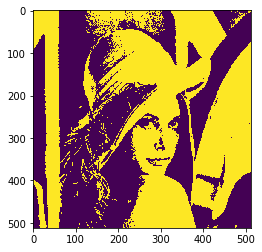

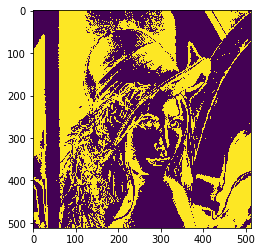

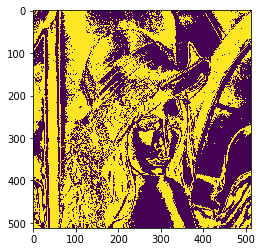

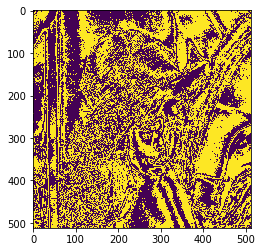

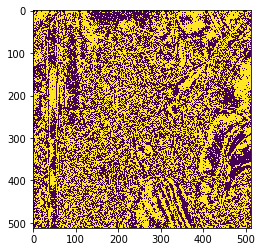

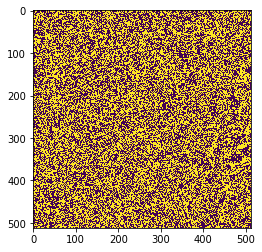

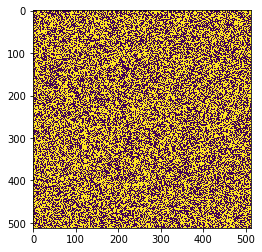

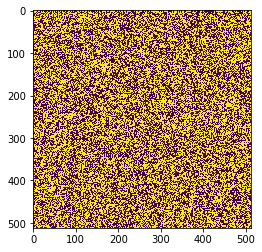

In [4]:
for i in range(8):
    plt.figure()
    plt.imshow(stegImg[:,:,i])
    #print(stegImg[:,:,i].shape)

In [5]:
msgImg = cv2.imread('StegoDataset/F16.tiff', 0)

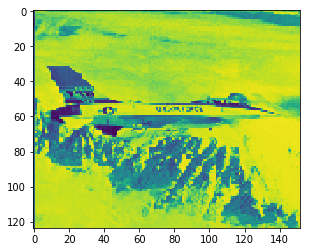

In [6]:
plt.imshow(msgImg)

In [7]:
stegImg.shape[0]*stegImg.shape[1], 8*msgImg.shape[0]*msgImg.shape[1]

(262144, 150784)

In [8]:
cipherText = np.reshape(msgImg, msgImg.shape[0]*msgImg.shape[1])

In [9]:
newCipherText = []
for i in cipherText:
    temp = np.binary_repr(i, width=8)
    for j in temp:
        newCipherText.append(j)

In [10]:
counter = 0
for i in range(stegImg[:,:,7].shape[0]):
    for j in range(stegImg[:,:,7].shape[1]):
        if counter <= msgImg.shape[0]*msgImg.shape[1]*8 - 1:
            stegImg[:,:,7][i][j] = newCipherText[counter]
            counter += 1

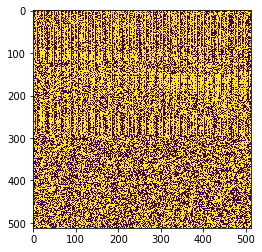

In [11]:
plt.imshow(stegImg[:,:,7])

In [12]:
str(int(stegImg[0][0][1]))

'0'

In [13]:
cipherImg = np.zeros(img.shape)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        temp = []
        for k in range(8):
            temp.append(int(stegImg[i][j][k]))
        cipherImg[i][j] = np.packbits(temp)

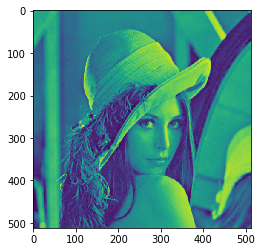

In [14]:
plt.imshow(cipherImg)